# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize

%matplotlib inline

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [2]:
# load the data
world_bank_df = pd.read_json('data/world_bank_projects.json')

# find the 10 countries with the most projects
world_bank_df.countryname.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

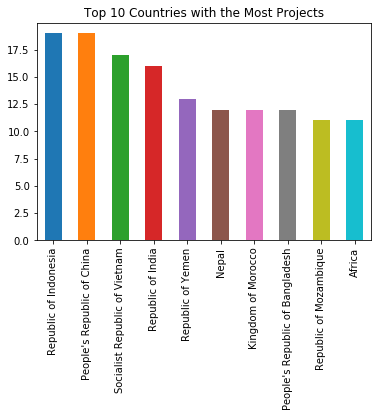

In [3]:
# plot the 10 countries with the most projects
world_bank_df.countryname.value_counts().head(10).plot(kind='bar', title='Top 10 Countries with the Most Projects')

In [4]:
# find the top 10 major project themes
theme_data = json.load(open('data/world_bank_projects.json'))
mjtheme_df = json_normalize(theme_data, 'mjtheme_namecode')
mjtheme_df.name.value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

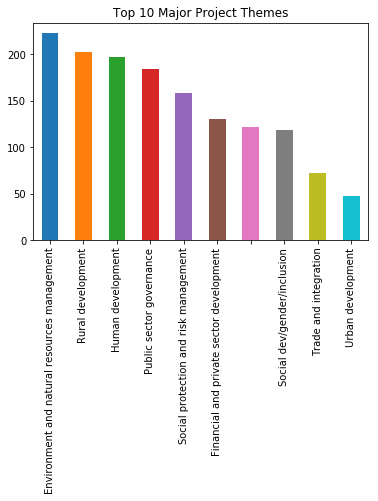

In [5]:
# plot the top 10 major project themes
mjtheme_df.name.value_counts().head(10).plot(kind='bar', title='Top 10 Major Project Themes')

In [7]:
# create a dataframe with missing values filled
mjtheme_df = mjtheme_df.sort_values('code',).replace('', np.nan).bfill()
mjtheme_df

,code,name
458,1,Economic management
1114,1,Economic management
454,1,Economic management
453,1,Economic management
1257,1,Economic management
1260,1,Economic management
1212,1,Economic management
249,1,Economic management
1057,1,Economic management
841,1,Economic management


In [8]:
# find top 10 major themes with filled dataframe
mjtheme_df.name.value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64